**Demented vs. Nondemented Classification**
---



**Project Overview**

This project involves developing a Machine Learning model to classify patients as demented or non-demented. It is conducted independently using data from the [MRI and Alzheimer's Kaggle Dataset](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv).

  **Objectives** :  The primary goal for this project is to understand each step in the machine learning development processes, creating a structured guide for developing and deploying the demented vs non-demented classification model. Key steps covered in this project are as follows:
  - `Data Collection`: Gathering and organizing relevant data for model development and training
  - `Data Preprocessing`: Cleaning and preparation stage before proceeding to the analysis stage.
  - `Exploratory Data Analysis (EDA)`: Analyzing the prepared data through visualization and identifying correlations or patterns within variables.
  - `Feature Engineering`: Feature selection to improve efficiency and model accuracy.
  - `Model Selection`: Testing and choosing the most suitable model for classification.
  - `Model Training`: Training the selected model to learn patterns.
  - `Model Evaluation`: Evaluating and giving assesment on model accuracy and effectiveness using several evaluation metrics.
  - `Model Deployment`: Deploying the model to make prediction in a production setting.

## **A. Importing Libraries**

<justify>

In any model development, not only in machine learning, the initial step is to declare all of the necessary libraries. Throughout this machine learning model development, we will be focusing heavily on several notable libraries. Their functions are as follows:
- `Pandas` : data analyzing, data cleaning, exploratory data, and data manipulation
- `Matplotlib` : data visualization and statistical plotting
- `Seaborn` : data visualization and statistical plotting
- `Scikit-learn` : model creation, feature engineering, evaluation, machine learning algorithm
- `Phik` : categorical feature selection

Although their occurences are not as frequent as the libraries above, several other libraries such as `Numpy`, `Random`, `Pickle`, and `XGboost` are also implemented in this model development.

In [1]:
pip install feature-engine

In [2]:
pip install phik

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import phik
import pickle
import plotly.express as px

# Import libraries for Data Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import RFE, RFECV

# Import libraries for Model Training & Evaluation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## **B. Data Collection**

The dataset acquired from Kaggle is stored in CSV format. To access the data, we can use the CSV reading function `pd.read_csv` provided by pandas.

In [4]:
pdDS = pd.read_csv('/content/DementedvsNonDemented.csv')

Generally, as we manipulated data for analysis and then for model creation, there are possibilities of accidentally creating irreversible changes into the DataFrame we use. In that scenario, there are no other way except of starting over. An action which will take effort and time.

To mitigate this possibility, we will utilize pandas copy function `.copy()`. This function created a duplication of the data we need and allow for an experiment without affecting the original data. This will prove useful in the long way.

In [5]:
df = pdDS.copy()
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


The DataFrame above showed that we have succesfully loaded and copied the dataset. Based on the short information given, we have around 373 data (rows) and about 15 input features (columns).

To have better insight on the input features, below are the detailed descriptions along with their data types:

<center>

|**Column Name**|**Description**|**Data Type**|
|:---|:---|:---|
|**Subject ID**|**Subject Identification (i.e. OAS2_0001)**|**Categorical Nominal**|
|**MRI ID**|**MRI Exam Identification (i.e. OAS2_0001_MR1)**|**Categorical Nominal**|
|**Group**|**Class (i.e. Demented, Nondemented)**|**Categorical Nominal**|
|**Visit**|**Number of visits (i.e. 1-5)**|**Categorical Ordinal**|
|**MR Delay**|**Number of days of delay between visits (i.e. 0-2639)**|**Numerical Discrete**|
|**M/F**|**Gender (i.e. M, F)**|**Categorical Nominal**|
|**Hand**|**Right or Left-Handed (i.e. R)**|**Categorical Nominal**|
|**Age**|**Age at time of image acquisition (years). (i.e. 60-98)**|**Numerical Discrete**|
|**EDUC**|**Years of education (i.e. 6-23)**|**Categorical Ordinal**|
|**SES**|**Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)**|**Categorical Ordinal**|
|**MMSE**|**Mini-Mental State Examination (i.e. 4-30)**|**Categorical Ordinal**|
|**CDR**|**Clinical Dementia Rating (i.e. 0-2)**|**Categorical Ordinal**|
|**eTIV**|**Estimated total intracranial volume (cm^3) (i.e. 1106-2004)**|**Numerical Discrete**|
|**nWBV**|**Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)**|**Numerical Continuous**|
|**ASF**|**Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)**|**Numerical Continuous**|

The table above has provided us with each features data type. However, for better understanding in the programming context, below are the data types generated through the `.info()` function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Another detail we can take note before proceeding onto the next stage is by examining the data using the `.describe()` function. This function specifically offer us a comprehensive report on any feature with number. It showed us the exact count of the data, the lowest and highest value, along with its statistical data such as mean and standard deviation. This information gave us a hint on what to expect next. For example, the range value number varies between features, suggesting that in the later course we may need to implement a scaling transformation procedure into our data.

In [7]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## **C. Data Cleaning**

**i. Duplication and Unique Value check**

In Data Cleaning, there are several steps that we can execute. The first include inspecting for any duplicated value within our data. This is quite important, since the presence of a duplicate in our data without proper cleaning may result in our credibility and affect the validity of our result.

To check for any duplicated data, we can make use of the `.duplicated()` function. To simplify and count the exact number of possible duplicated data, we can further add the `.sum()` function.

In [8]:
df.duplicated().sum()

0

The second step in this stage of Data Cleaning include assessing the unique value of each features. Utilizing the `.nunique()` to automatically count the number of value unique to that feature.

In [9]:
df.nunique()

,0
Subject ID,150
MRI ID,373
Group,3
Visit,5
MR Delay,201
M/F,2
Hand,1
Age,39
EDUC,12
SES,5


The unique value assessment has proven fruitful. While on the previous step we found no duplicated data, here, we unexpectedly discovered many features with numerous unique value contained within. Some (e.g., `eTIV`, `nWBV`, `Age`, `MR Delay` and `ASF`) were expected due to their nature as a Numerical Discrete data type. While some other (e.g., `Visit`, `M/F`, `EDUC`, `SES`, `MMSE`, `CDR`) have considerably less unique value due to their Categorical data type.

Among the 15 features, 11 have valid reasons that explained this occurence. The remaining four features, on the other hand, showed signs of requiring a data cleaning process. The first two features: `Subject ID` and `MRI ID` have 150 and 373 unique value, respectively. Both features, as the name suggests, functioned as the dataset unique identifier. A value which will not provide insight nor contribute to model prediction later on. It will however, help us in aggregating our dataset in the future section. Thus, one of the feature, namely the `Subject ID` feature, will be kept in our current dataframe. While the other, `MRI ID`, will be dropped.

In [10]:
df = df.drop(columns=['MRI ID'])

Next, the second feature to be dropped is the `Hand` feature. As seen from the list above, this feature contained only one unique value. Indicating no further insight could be extracted.

In [11]:
df = df.drop(columns=['Hand'])

The last feature, `Group`, are both surprising and predictable. The feature itself, being our target prediction, supposed to have only two unique values: **Demented** and **Nondemented**. Instead, the list told us this feature contained three unique values (see the code output below). The extra unique value came from the dataset inherent nature, i.e., a longitudinal data where some patients initially not diagnosed as dementia but on later visits were re-diagnosed as dementia.

In [12]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

To remedy this incident, we can convert the extra class into the **Demented** class. The fact that the patients within this class eventually diagnosed with dementia indicates that their data contain dementia-related indicator, providing valuable insight.

In [13]:
df.loc[df['Group']=='Converted','Group'] = 'Demented'

In [14]:
df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

**ii. Missing Value Handling**

The second stage of Data Cleaning in our project involve investigating missing value. Missing values or **NaN** refer to any undefined data present in dataset. This particular data, if left alone, will distrupt the analysis process. Ineffectively introduce biases and distort the overall result. Therefore, in this step, we will verify the presence of missing value in our data.

In [15]:
# Check which variable contain missing value ('NaN')
for i, var in enumerate(df):
  if any(df.iloc[:,i].isnull()):
    print(var, df.iloc[:,i].isnull().sum())

SES 19
MMSE 2


Based on the output above, we now confirmed that both `SES` and `MMSE` feature columns contained missing values: 19 and 2 missing values. Representing approximately 5.1% an 0.5% of the total data, respectively. To gain better insight, it is imperative to directly look upon the sets of data with missing values. See below.

In [16]:
df[df.isnull().any(axis=1)]

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,Demented,1,0,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,Demented,3,518,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,Demented,1,0,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,Demented,2,490,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,Demented,1,0,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,Demented,2,807,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


The filtered dataframe provided the necessary insights efficiently. From the data, we can infer that the missing values originated from the same subject IDs. Indicating fewer subjects are responsible for the missing values than initialy appeared.

Closer examination on the variable details (see section **B**) uncovered key insight that defined the category of the missing values. The column SES pertains to the subject's economic condition, while the MMSE column reflects the subject's mental condition. Both variables are likely to be left blank for particular reasons such as the subject's reluctance to disclose this information.

These insights combined indicate that the missing values falls under the category of **Missing Not At Random** (MNAR). Normally, missing values in this category require complex approaches to produce optimal inferences. However, to streamline the overall model development in this project, methods such as **multiple imputation** (MI) can be applied using the following procedure to address these missing values.

To impute the missing data, here we will employ the `IterativeImputer` function derived from `Scikit-learn`. This particular imputation method was chosen due to its inherent property as a multivariate imputation algorithm. Its method of repeatedly refining estimations between iterations ensure an accurate and non-bias imputation.

In [17]:
# Impute missing data with IterativeImputer from sklearn
df_imputer = IterativeImputer()
imputed_df = df_imputer.fit_transform(df[['SES','MMSE']])

imputed_df = pd.DataFrame(imputed_df, columns=df[['SES','MMSE']].columns)

# Convert continuous data on SES and MMSE into discrete data
imputed_df['SES'] = round(imputed_df['SES'])
imputed_df['MMSE'] = round(imputed_df['MMSE'])

# Replace original data with imputed data
df['SES'] = imputed_df['SES']
df['MMSE'] = imputed_df['MMSE']

To confirm that the imputation has been entered correctly, below are the first five data in our dataset.

In [18]:
df.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,3.0,22.0,0.5,1698,0.701,1.034


## **D. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is another crucial stage in Data Preprocessing. This stage involved visualizing each features and analyze their main characteristics. As the initial step, below are the list of features in our dataset:

In [19]:
col_df = df.columns
print(len(df.columns))
col_df

13


Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

**i. Histogram Plot for Numerical Data**

Dedicated to the numerical data in our dataset, the histogram plot visually represented the distribution of each numerical features. Fundamentally, a histogram plot grouped the values into certain range of intervals. The count of interval set depends on the number we set to the `bin` parameter along the x-axis. Subsequently, the plot will generate a height bar, which indicates how many values are grouped into each bin. The height bars combined, along with the line added in this plot, will reveal any bias or potential skewness.

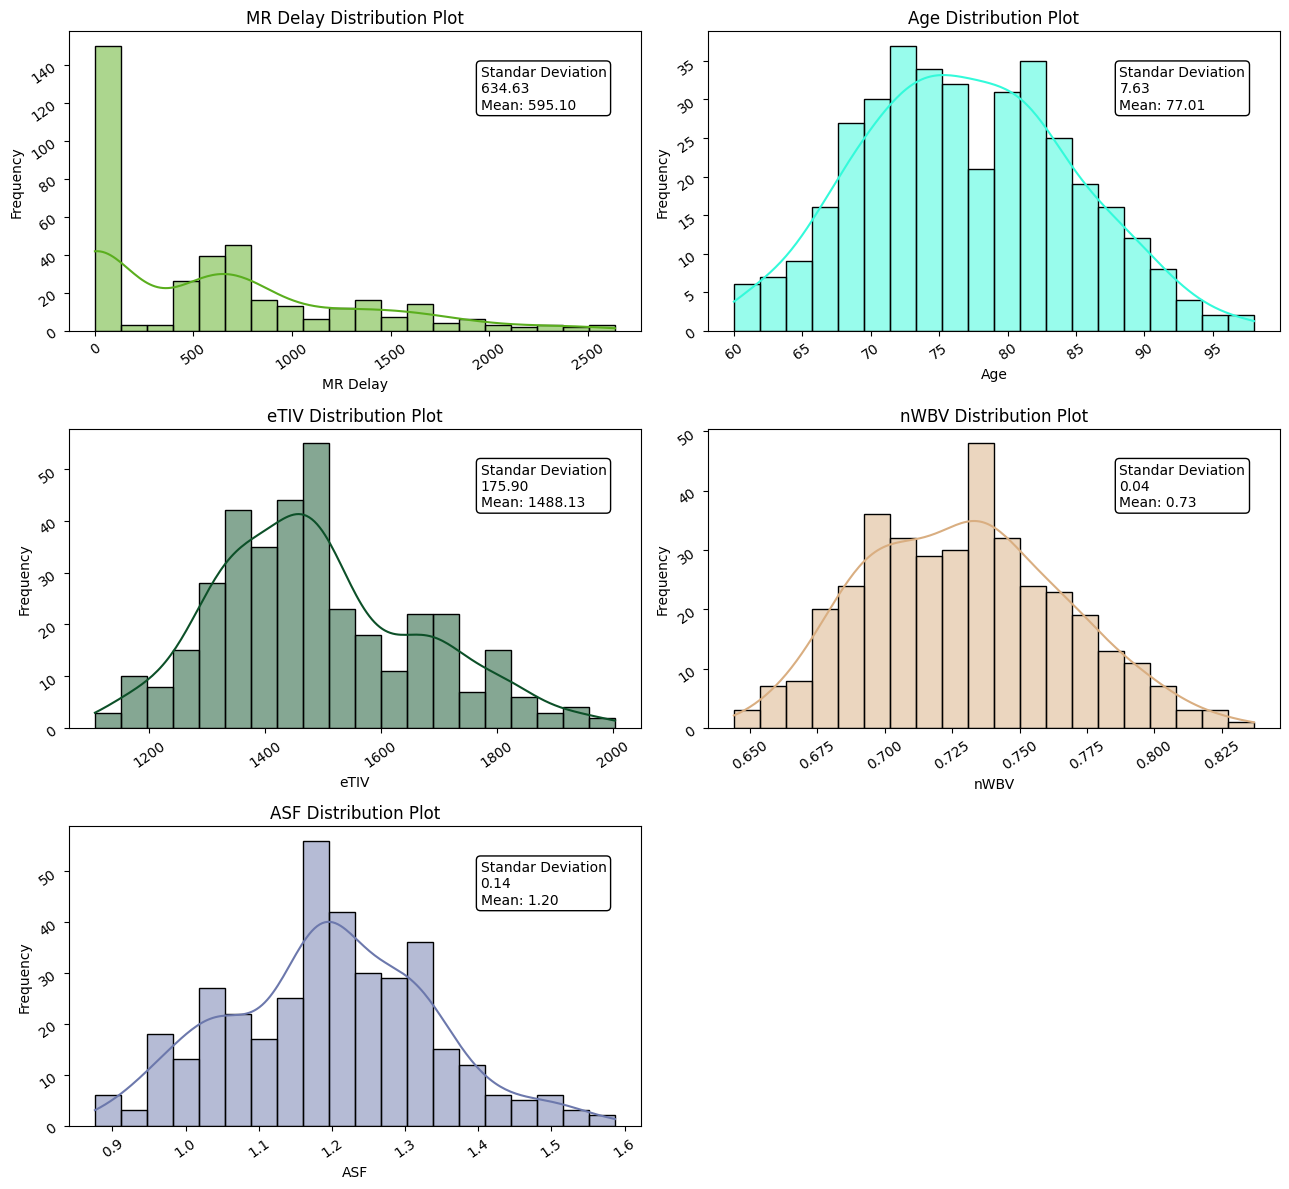

In [20]:
# List all numerical features
col_hist = ['MR Delay', 'Age', 'eTIV', 'nWBV', 'ASF']

# Create a function that return random RGB
def random_color():
    return [random.random() for _ in range(3)]

# Create subplots
fig, axes = plt.subplots(3,2, figsize=(13,12))
axes = axes.flatten()

# Iterate the histogram plotting over each numerical features
for i, var in enumerate(col_hist):
  # Compute the Standar Deviation and Mean of the feature
  std = np.std(df[var])
  mn = np.mean(df[var])

  sns.histplot(data=df, x=var, ax=axes[i], kde=True,color=random_color(), edgecolor='black', bins=20)
  axes[i].set_title(f'{var} Distribution Plot')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')
  axes[i].tick_params(labelrotation=35)

  # Define additional set box inside plot which contain Std and Mean
  if var == 'MMSE':
    x_y = (0.6,0.85)
  else:
    x_y = (0.7,0.85)

  props = dict(boxstyle='round', edgecolor='black', facecolor='white')
  axes[i].annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)

# Hide unused figure
for j in range(len(col_hist), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Normal Distribution**
  
  The generated histogram plots revealed valuable insight as we expected. Three out of the five feature columns, i.e., `Age`, `nWBV`, and `ASF`, displayed a fairly well distribution. The values are evenly spread across interval sets, indicating no skewness or bias influencing these features.  

- **Bias & Skewness**

  Unlike the previous three features, the remaining features: `MR Delay` and `eTIV` noticeably contained bias and skewness. The `eTIV` feature's values visibly higher in counts towards the left side of mean value, while the right side tail is longer than its counterpart. The same case, worst even, happened to `MR Delay`. This feature's value eminently gathered on the leftmost side, which represent the earliest MRI scans of the patients.

  Considering the nature of the feature, the first MRI scans of patients will always default to zero. The extremely biased and skewed visual representation of `MR Delay` does not provide clear evidence of whether the feature is actually biased and skewed. Thus, for this reason, we decided to re-plot the `MR Delay` histogram with the constraint: (`MR Delay` value > 0).

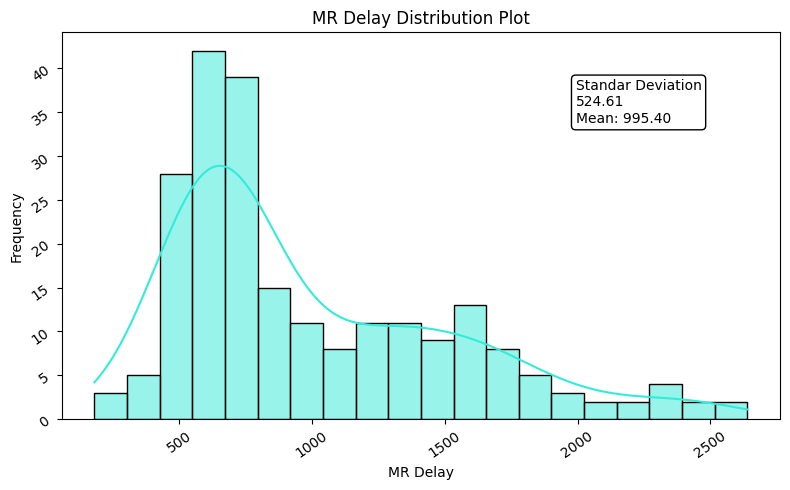

In [21]:
# Filter MR Delay to value > 0
mrd = df[df['MR Delay']>0]

# Compute the Standar Deviation and Mean of the feature
std = np.std(mrd['MR Delay'])
mn = np.mean(mrd['MR Delay'])

# Plot the histogram
plt.figure(figsize=(8,5))
sns.histplot(mrd['MR Delay'], label='MR Delay', kde=True,color=random_color(), edgecolor='black', bins=20)
plt.title('MR Delay Distribution Plot')
plt.xlabel('MR Delay')
plt.ylabel('Frequency')
plt.tick_params(labelrotation=35)

# Plot the additi
props = dict(boxstyle='round', edgecolor='black', facecolor='white')
plt.annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)

plt.tight_layout()
plt.show()

From this new `MR Delay` histogram plot, we can summarize that the feature is indeed biased and skewed. The values within heavily leaned toward the leftside, while the right tail is much longer than its counterpart. Similar to the `eTIV` feature.

**ii. Count Plot for Categorical Data**

For the categorical data, bearing in mind that they consist of predefined values within a certain range of integral values, we decided to utilize the count plot available through Seaborn. This plot counts the total occurrence of each value and demonstrates the result via bar heights, similar to the histogram plot in the previous section. Unlike the histogram plot, however, this plot does not aim to analyze the distribution but instead directly visualizes the frequency of each category. It helps in identifying patterns or imbalances in categorical data by comparing the frequency of different values.

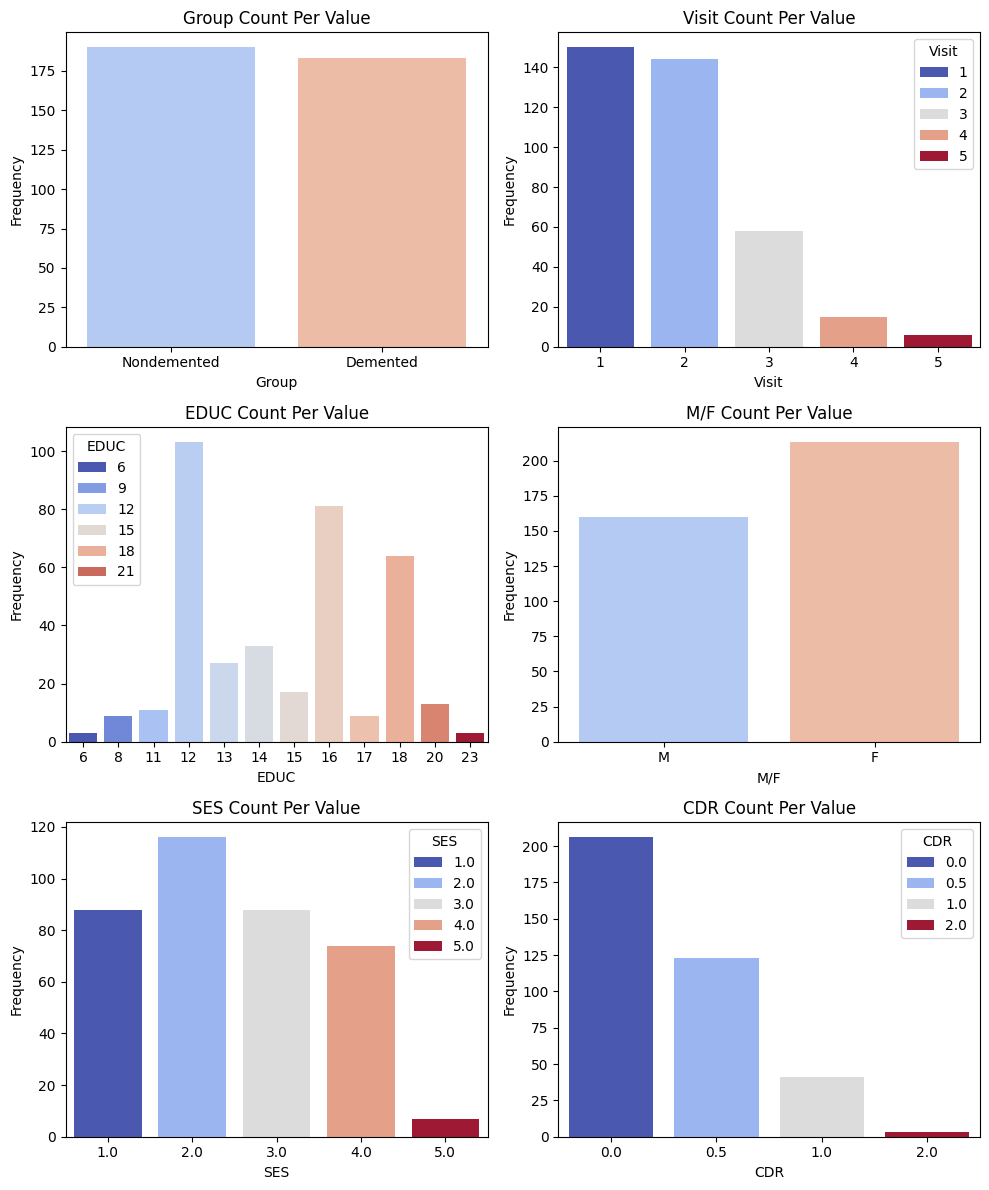

In [22]:
# List all categorical features
col_bar = ['Group', 'Visit', 'EDUC','M/F', 'SES', 'CDR']

# Create subplots
fig, axes = plt.subplots(3,2, figsize=(10,12))
axes = axes.flatten()

# Iterate the histogram plotting over each numerical features
for i, var in enumerate(col_bar):
  sns.countplot(x = var, data=df, ax=axes[i],hue=var, palette='coolwarm')
  axes[i].set_title(f'{var} Count Per Value')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')

# Hide unused figure
for j in range(len(col_bar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The count plot worked as intended. Each categorical features was successfully created and displayed (see above). Below are the breakdown of each features data analysis:

- `Group`

  Serving as the main target, the `Group` feature showed a well balanced number of frequency between each unique value (**Demented**, **Nondemented**). This is a good sign, as it indicates that imbalance data handling may not be necessary in the next section.

- `Visit`

  The `Visit` feature are found largely between the first and second visits, with the last three visits having fewer occurences. This suggests that the visits frequency diminishes overtime, indicating fewer need for follow-up assessment.

- `EDUC`

  The `EDUC` feature has a fairly wide categorical value, as demonstrated above. This features's value were distributed broader than expected. However, it still showed high frequency trend in several values (i.e., 12, 16, and 18). Those values may prove important in later analysis.  

- `M/F`

  This particular feature consists of only two unique values: Male (M) and Female (F). While the values are not perfectly balanced, their frequency counts are close to each other, indicating that the data collection has been conducted fairly across genders.

- `SES`

  Similar to the other features, the `SES` feature also has a fairly well balanced frequency distribution. With one exception, the last value have much fewer frequency than others. This suggests that both Demented and Nondemented patients have similar socioeconomic status.

- `CDR`

  Lastly, the CDR feature displayed varying frequency distribution across its value interval. This feature is among the most crucial in the dataset, as it provides the score for the clinical dementia rating. The varying frequency of the data (with the value 0 having the highest frequency) suggests that one of the target predictions may be distributed differently across certain value ranges. However, whether this assumption holds true will be determined in later analysis.

**iii. Pie Chart**

Before we proceed to the next stage, there is, in fact, one more feature that we have yet to analyze: `MMSE`. This feature actually falls into the categorical data. However, the total number of values interval are higher than other categorical data, requiring different visualization method to completely comprehend this feature. Thus, the following pie chart were employed to visually represent this feature:

In [23]:
# Plot a pie chart using the plotly express to represent the MMSE feature
fig = px.pie(df, values='MMSE', names='MMSE', title='MMSE Count Percentage')

fig.show()

![pie_chart.png](data:image/png;base64, Demented and Nondemented Classification/pie_chart.png)

The pie chart turned out splendidly. It successfully visualize and displayed the percentage of every interval value. Evaluating the chart provided us with the insight that the majority of patients revolve around the higher class ranges (i.e., 28, 29, and 30). The feature itself, like `CDR`, also give clinical assesment involving the head. Specifically, the feature were tuned to the mental health scores of each patients. Similar to `CDR`, this finding imply that MMSE also have significant impact on our machine learning.

## **E. Feature Engineering**

After completing the initial stages of Data Preprocessing (i.e., Data Cleaning and Exploratory Data Analysis), we have now reached the final stage before Model Development. This stage comprises several substeps, including Data Aggregation, Outlier Handling, Correlation Analysis, Feature Selection, and finally, Feature Transformation.

**i. Data Aggregation**

As the name suggests, this step involves transforming our raw dataset into its aggregated form. This transformation was performed due to the longitudinal nature of our dataset. Since we are not aiming for a time-series dependent classification, we aim to reduce redundancy and simplify the data by grouping the patients' data (each may have more than one entry) based on their mean. This was done using the `.groupby()` and `.agg()` functions.

To aggregate the dataset, however, required meticulous treatment for each features. Starting from the `Subject ID`, since this feature is the backbone for grouping the dataset, there will be no specific change applied. The `Group`, `Visit`, and `M/F` have similar categorical or ordinal values in that they are not suitable for mathematical operation. Particularly, in `Visit`'s case, calculating the mean does not fully reflect the features value, because as we know this feature represent the total number of visits a patient undergoes. Therefore, these features take the first or last value in the same patient group as its final value. The remaining features (9) were aggregated through the `mean()` function. Six of them uses the `lambda` function to simultaneously rounded up the final value.

In [24]:
coded_df = df.groupby(['Subject ID']).agg({
    'Group' : 'first',
    'Visit' : 'last',
    'MR Delay' : lambda x: round(x.mean()),
    'M/F' : 'first',
    'Age' : lambda x: round(x.mean()),
    'EDUC' : lambda x: round(x.mean()),
    'SES' : lambda x: round(x.mean()),
    'MMSE' : lambda x: round(x.mean()),
    'CDR' : 'mean',
    'eTIV' : lambda x: round(x.mean()),
    'nWBV' : 'mean',
    'ASF' : 'mean'
})

coded_df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,Nondemented,2,228,M,88,14,2,28,0.000000,1996,0.688500,0.879500
OAS2_0002,Demented,3,818,M,77,12,3,24,0.500000,1705,0.716667,1.030000
OAS2_0004,Nondemented,2,269,F,89,18,3,28,0.000000,1208,0.714000,1.453000
OAS2_0005,Nondemented,3,871,M,83,12,4,29,0.166667,1696,0.709333,1.034667
OAS2_0007,Demented,4,600,M,73,16,2,27,0.833333,1365,0.728333,1.286000


As we can see, the aggregation worked well. The dataset, which initially had around 373 entries, now contained only about 150 data. Much fewer and more compact than previous. This step, however, are not finished yet. There is one feature, the `CDR`, that require complicated handling and therefore handled separately. This feature, in fact, belongs to a categorical nominal, and therefore, to transform it back from a `float` into `int`, we will apply a custom transformation, as follows:  

In [25]:
def custom_round(val):
  if val == 0:
    return 0
  int_part = int(val)
  dec_part = val - int_part
  if 0 < dec_part <= 0.5:
    return int_part + 0.5
  else:
    return int_part + 1.0

coded_df['CDR'] = coded_df['CDR'].apply(custom_round)

coded_df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,Nondemented,2,228,M,88,14,2,28,0.0,1996,0.688500,0.879500
OAS2_0002,Demented,3,818,M,77,12,3,24,0.5,1705,0.716667,1.030000
OAS2_0004,Nondemented,2,269,F,89,18,3,28,0.0,1208,0.714000,1.453000
OAS2_0005,Nondemented,3,871,M,83,12,4,29,0.5,1696,0.709333,1.034667
OAS2_0007,Demented,4,600,M,73,16,2,27,1.0,1365,0.728333,1.286000


**ii. Outlier**

Entering the second stage of Feature Engineering: Outlier Handling. Here, we will focus on investigating any outliers within the numerical data. The reason is that categorical data typically consists of values that conform to a predefined set of value intervals. In contrast, numerical data does not have a defined range. Instead, as evaluated in the last EDA section, it defines its own set of ranges through normal distribution and standard deviation.

- **Boxplot Visualization**

  To investigate the outliers, we can first visualized each numerical data with boxplot using the following function:

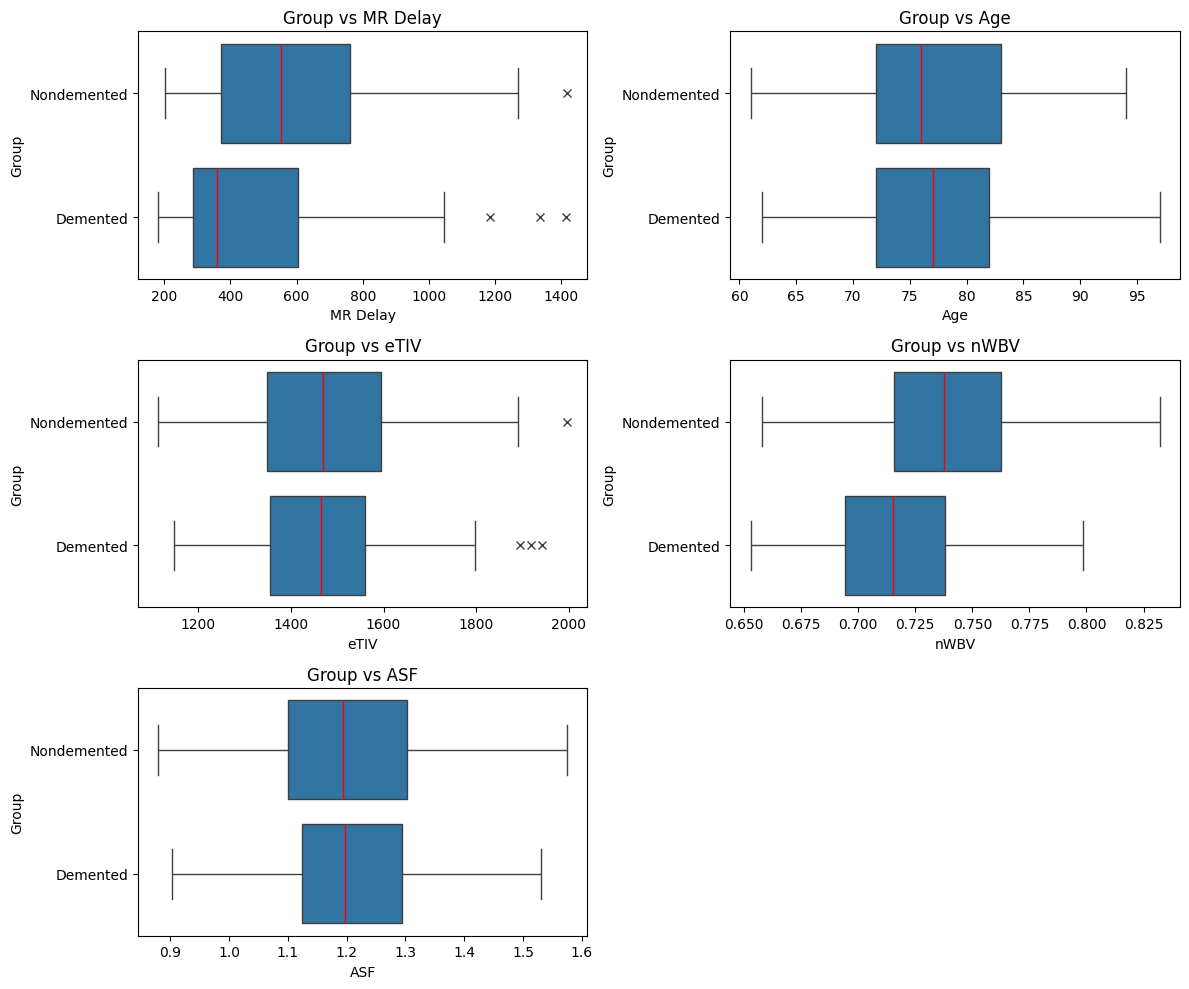

In [26]:
# List all numerical features
df_out = ['MR Delay', 'Age', 'eTIV', 'nWBV', 'ASF']

# Create boxplot visualization function
def plot_interquartile_box(data, df, y='Group'):
  fig, axes = plt.subplots(3, 2, figsize=(12,10))
  axes = axes.flatten()

  # Iterate through each features
  for i, var in enumerate(df):
    axes[i]
    sns.boxplot(data=data, x=var, y=y, ax=axes[i], medianprops={'color':'r'}, flierprops={'marker':'x'})
    axes[i].set_title(f'Group vs {var}')

  # Hide unused figure
  for j in range(len(df_out),len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

# Plot the boxplot
plot_interquartile_box(coded_df, df_out)

As we can see, the outliers were represented by the 'x' tick which was present in both `MR Delay` and `eTIV`. To confirm these findings, we can followed up by investigating each numerical features' skewness, as follows:

- **Skewness Investigation**

In [27]:
# Create function to check the feature's skewness
def check_skewness(df, cols):
  # Define different skew type
  normal = {}
  skewed = {}
  extremely_skewed = {}

  # Iterate through each column to calculate skewness
  for var in cols:
    skew_score = round(df[var].skew(),2)
    if skew_score <= 0.5: # To gather features with normal distribution
      normal[var] = skew_score
    elif 0.5 < abs(skew_score) < 1: # To gather features with skewed distribution
      skewed[var] = skew_score
    else: # To gather features with extremely skewed distribution
      extremely_skewed[var] = skew_score

  return normal, skewed, extremely_skewed

# Obtain the features skewness type
normal, skewed, extremely_skewed = check_skewness(coded_df, df_out)
print(f'Normal: {normal}\nSkewed: {skewed}\nExtremely Skewed: {extremely_skewed}')

Normal: {'Age': 0.16, 'nWBV': 0.34, 'ASF': 0.04}
Skewed: {'eTIV': 0.59}
Extremely Skewed: {'MR Delay': 1.14}


The result above confirms our previous findings: both MR Delay and eTIV contain skewed values. This confirmation also validates our analysis in the EDA section regarding the categorical column count plot. Therefore, the next step is to determine the total number of outliers and their percentage relative to the total data in the dataset, as follows:

- **Outlier Count and Percentage**

In [28]:
# Create function to calculate the outlier count and percentage
def check_outlier_percentage(df, skew_type, cols, distance=1.0):
  # Iterate through each column and calculate according to their type
  for var in cols:
    if skew_type == 'normal': # To check for any outliers within features with normal distribution
      std = df[var].std()
      mean = df[var].mean()
      lower_bound = mean - (3 * std)
      upper_bound = mean + (3 * std)
    elif skew_type == 'skewed': # To check for any outliers within features with skewed distribution
      Q1 = df[var].quantile(0.25)
      Q3 = df[var].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1 - (IQR * distance)
      upper_bound = Q3 + (IQR * distance)


    # Mask dataset value to match the outliers and calculate the count & percentage
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    outlier_count = len(outliers)

    print(f'Outlier Percentage and Count of {var}: {outlier_percentage:.2f}% and {outlier_count}')

# Check the outlier percentage
check_outlier_percentage(coded_df, 'normal', normal.keys())
check_outlier_percentage(coded_df, 'skewed', skewed.keys())
check_outlier_percentage(coded_df, 'skewed', extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 6.67% and 10
Outlier Percentage and Count of MR Delay: 4.67% and 7


The output above are consistent with the boxplot yielded previously. None of the three normal distributed columns (i.e., `Age`, `nWBV`, and `ASF`) contained any outlier. While `eTIV` and `MR Delay` both have 10 outlier with 6.67% percentage and 7 outlier with 4.67% percentage, respectively.

Now that we know how many outliers are present and in which features, we can finally move on to the next step of outlier handling: transforming the outliers using `Winsorizer()` technique.

- **Outlier Transformation with Winsorizer()**
  
  `Winsorizer` is one among the many statistical technique used for outlier handling. This method works by detecting values that exceeded certain percantile threshold and proceed to cap/replace those values with similar values within the top (95th) or bottom percentiles (5th), depending on the value's position.

In [29]:
# Create winsorizer function for outlier transformation
def winsorizer(df, variables, capping_method='iqr', tail='both', fold=0.8):
  winsorizer = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
  df_trained = winsorizer.fit_transform(df)
  return df_trained

# Transform the outlier
transformed_df = winsorizer(coded_df, ['eTIV','MR Delay'])

# Round up the eTIV and MR Delay features to match its original data type
transformed_df['eTIV'] = np.round(transformed_df['eTIV'])
transformed_df['MR Delay'] = np.round(transformed_df['MR Delay'])

transformed_df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,Nondemented,2,228.0,M,88,14,2,28,0.0,1761.0,0.688500,0.879500
OAS2_0002,Demented,3,818.0,M,77,12,3,24,0.5,1705.0,0.716667,1.030000
OAS2_0004,Nondemented,2,269.0,F,89,18,3,28,0.0,1208.0,0.714000,1.453000
OAS2_0005,Nondemented,3,871.0,M,83,12,4,29,0.5,1696.0,0.709333,1.034667
OAS2_0007,Demented,4,600.0,M,73,16,2,27,1.0,1365.0,0.728333,1.286000


As we can see, the outliers have been succesfully transformed by `Winsorizer`. To confirm this, we can visualize the boxplot and check the outlier percentage and count once more:

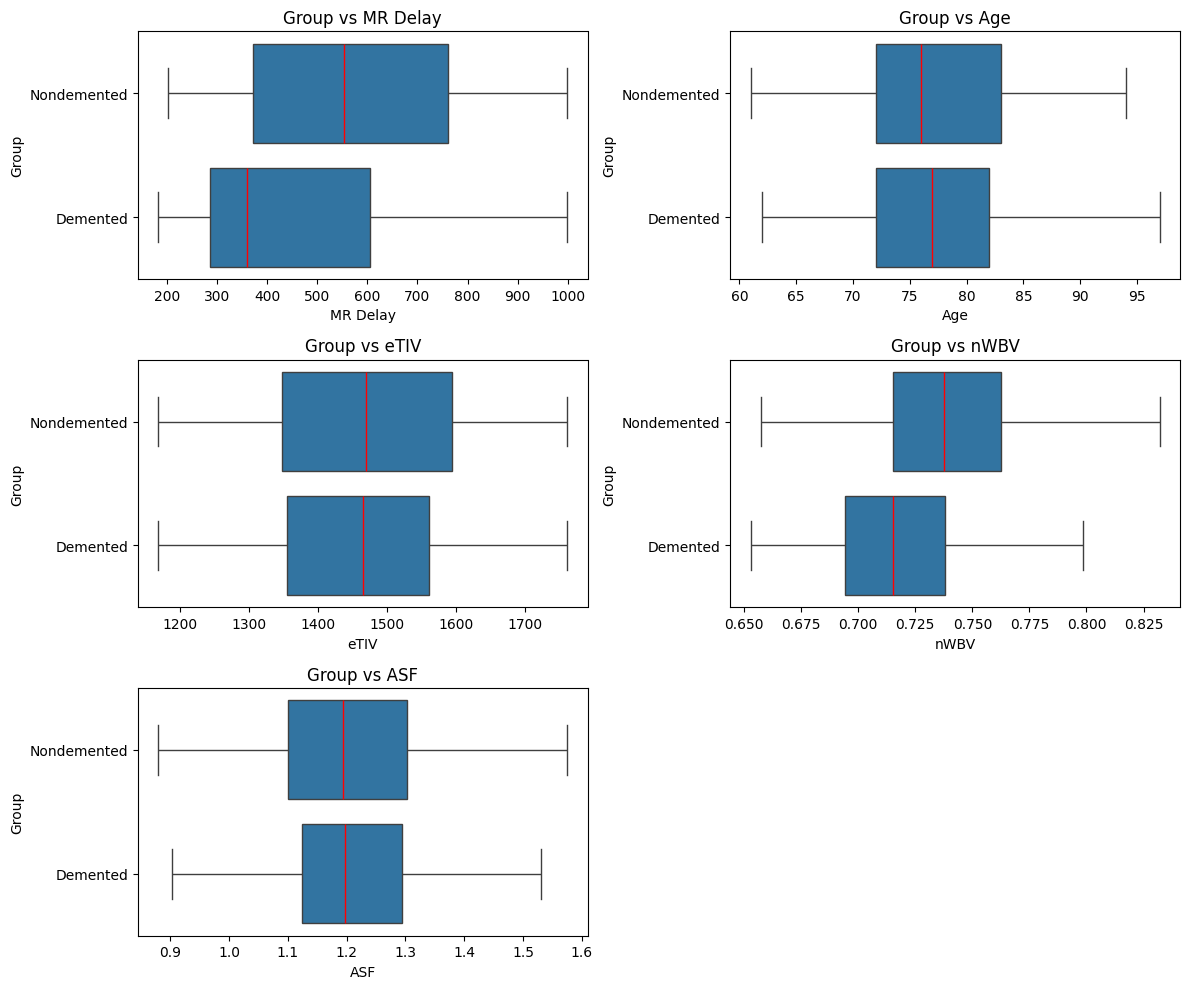

In [30]:
# Plot the boxplot
plot_interquartile_box(transformed_df,df_out)

In [31]:
# Check outlier count & percentage
check_outlier_percentage(transformed_df,'normal',normal.keys())
check_outlier_percentage(transformed_df,'skewed',skewed.keys())
check_outlier_percentage(transformed_df,'skewed',extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 0.00% and 0
Outlier Percentage and Count of MR Delay: 0.00% and 0


**iii. Feature Corelation Investigation with Pearson**

This section serves as a preparation for the feature selection in upcoming section. Specifically, here, we will investigate the correlation of each features with one another. Correlation analysis is essential in any model development. Bringing to light the complimentary effect between features, this analysis can effectively provide insights in reducing redundant features. Therefore, we can expect which features may be eliminated later.

To start the Pearson correlation analysis, we must make sure each features has meet the requirement, i.e., encoded the `string` values into `int` or `float` so that the `corr()` function can successfully perform the correlation analysis. Therefore, the following step can be implemented before plotting the correlation.

In [32]:
# Copied the latest dataset to preserve the original value
df_copy = transformed_df.copy()
df_to_convert = ['Group', 'M/F']

# Convert each features with object data type using cat codes function
for col in df_to_convert:
  df_copy[col] = df_copy[col].astype('category').cat.codes

The features has been encoded, now we can start plotting the Pearson Correlation:

<Axes: >

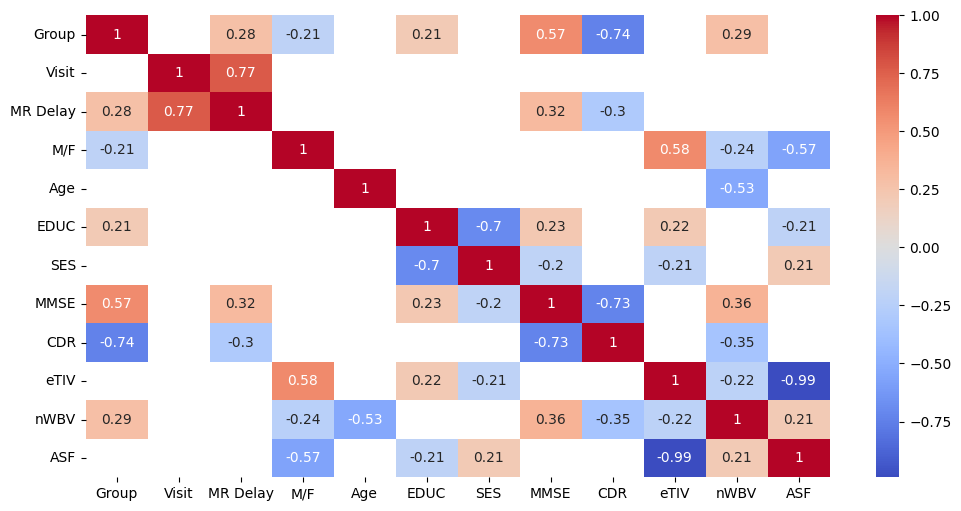

In [33]:
# Plot the Pearson Correlation
plt.figure(figsize=(12,6))
corr = df_copy.corr()
masks = (abs(corr)<=0.2) # Create masks to hide any correlation value within range [-0.2, 0.2]
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=masks)

The correlation result has been properly transformed into a heatmap configuration via the `Seaborn` library, and through this, we can now explore the features relationship with each other. To begin, the different colours (using coolwarm palette) indicates the direction and the degree of the correlation within two specific features. The red color indicate a **positive correlation**, meaning the two features with this color box affect each other in the same direction, i.e., if one increase the other also increase and vice verca. Conversely, the blue color indicate a **negative correlation**, which mean the two features move in opposite direction, i.e., one will increase while the other one decrease.

The correlation value are ranged between **-1**, **0**, and **1**. The value **-1/1** indicates maximum positive/negative relationship between the feature, while the value **0** indicates no relationship at all. The closer the correlation value to each maximum and minimum, the more it reveal whether the two features do not have any effect to each other, or, conversely, affect each other too much. Either option is not practical for model prediction. First, to predict something, the dementia status in our case, the features used in training must be ones that have sufficient correlation with the predict feature to capture relevant changes and information. Second, features with high or close to perfect correlation score are prone to redundancy as they will no longer provide new insight.

To overcome this issue, we have filtered the heatmap (using masks) to show only relevant score. In this case, we have chosen a value of **-0.2** and **0.2** as our masking threshold. This particular number was chosen to indicate that, in this model development, the value "0.2" is the lowest correlation score we will consider for our training data. Based on this, the heatmap above has yielded a number of relevant correlation score, within them a variad of positively correlated and negatively correlated features. Some, such as `eTIV` with `ASF` have extremely high negative correlation, which mean that we will benefit from eliminating one rather than incorporating both features.

Concerning our target feature, `Group`, we can see its correlation scores in the leftmost side or the first row of the heatmap. As we can infer that there are several features that are highly correlated to it and thus a candidate for our training data. Those features include: `MR Delay`, `M/F`, `EDUC`, `MMSE`, `CDR`, and `nWBV`. The remaining low correlated features are accordingly hidden away from sight. To observe those hidden feature correlation, below are the full correlation scores related to `Group`:

In [34]:
corr['Group']

,Group
Group,1.000000
Visit,0.172320
MR Delay,0.279780
M/F,-0.210282
Age,0.023323
EDUC,0.212378
SES,-0.055326
MMSE,0.565534
CDR,-0.738308
eTIV,0.020442


As observed, the remaining unmentioned features exhibit correlation scores within the range of (-0.2, 0.2), indicating little to no correlation with `Group`. However, this assumption requires further confirmation, which will be addressed in the subsequent feature selection section.

**iv. Feature Selection**

In this feature selection section, we will divide the process into two parts:

- Feature selection for categorical features, and
- Feature selection for numerical features

The selection was separated between the two data type due to their underlying character differences. Which require two different techniques that are more appropriate to handle each data type. In this case, we will be using the **Phik Correlation** for the categorical data and the **Recursive Elimination Feature** for the numerical data. This process may seem redundant with the previous Pearson Correlation analysis, however, implementing this ensure optimal feature selection and establish realibity to our training dataset.

a. Feature selection for categorical features

- **Phik Correlation**

  Phik correlation is known for its robust and specialty in assessing the correlation between categorical variables or between categorical variables and numerical target. Phik was specifically designed to be able to capture the non-linear relationship contained within and is capable of directly evaluating the categorical variables without requiring label transformation. Unlike the Pearson correlation above where it was typically used for analyzing numerical variables and therefore required label transformation, which may lead to information loss.

In [35]:
# Create Phik Correlation analysis function
def phik_correlation(df,cols):
  phik_corr = df[cols].phik_matrix()
  return phik_corr['Group']

# List all categorical features
categorical_col = ['Group','MMSE', 'Visit', 'EDUC','M/F', 'SES', 'CDR']

# Perform Phik Correlation analysis
phik_corr = phik_correlation(transformed_df, categorical_col)

print(phik_corr[1:])

interval columns not set, guessing: ['MMSE', 'Visit', 'EDUC', 'SES', 'CDR']
MMSE     0.779227
Visit    0.166817
EDUC     0.325634
M/F      0.278372
SES      0.000000
CDR      0.860744
Name: Group, dtype: float64


The result answered our assumptions from the previous Pearson correlation. The Phik correlation yielded the correlation scores of each categorical feature and, using our previous threshold, we can now eliminate the two categorical features with low correlation scores: Visit (Phik correlation score: 0.167) and SES (Phik correlation score: 0.0). Both of these features, as expected, were also hidden from the heatmap, confirming their irrelevance for our future training data.

In [36]:
# Eliminate both Visit and SES feature from dataset
phik_selected_df = transformed_df.drop(columns=['Visit','SES'])
phik_selected_df.head()

,Group,MR Delay,M/F,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,
OAS2_0001,Nondemented,228.0,M,88,14,28,0.0,1761.0,0.688500,0.879500
OAS2_0002,Demented,818.0,M,77,12,24,0.5,1705.0,0.716667,1.030000
OAS2_0004,Nondemented,269.0,F,89,18,28,0.0,1208.0,0.714000,1.453000
OAS2_0005,Nondemented,871.0,M,83,12,29,0.5,1696.0,0.709333,1.034667
OAS2_0007,Demented,600.0,M,73,16,27,1.0,1365.0,0.728333,1.286000


b. Feature selection for numerical features

- **Recursive Feature Elimination (RFE)**

  The Recursive Feature Elimination (RFE) is one of the many feature selection method available for numerical data. This method works by training the input variables with specific predictive models (e.g., SVC, RandomForest, Linreg, and etc.) and iteratively remove least important feature based on the model performances. RFE rank the feature's contribution by its contribution, and therefore suitable for numerical/continuous data. Further, it can identify features with high correlation to each other, thus eliminating one of them to reduce redundancy. This method does, however, required label transformation, which mean the target prediction, `Group`, will be encoded before proceeding to RFE feature selection.

In [37]:
# List all numerical features
df_num = ['MR Delay', 'Age', 'eTIV', 'nWBV','ASF']

# Separated target feature (as y) and training features (as x)
rfe_x = phik_selected_df[df_num]
rfe_y = phik_selected_df['Group'].astype('category').cat.codes  # Encode the target feature with cat codes

In this RFE feature selection, we will use the `RandomForestClassifier()` as our estimator model. This model particularly can handle non-linear relationships and also calculate the feature's feature importance, making it well suited to combine with RFE. For the RFE itself, unlike the normal RFE function, we decided to use the RFE with Cross-Validation (RFECV) function. This particular type of RFE was chosen due to our intention of eliminating as much feature as possible, leaving behind only the most important features for future prediction.

In [38]:
# Set the Random Forest model
rf_mod = RandomForestClassifier()

# Implement the RFECV to do feature selection
rfecv = RFECV(estimator=rf_mod, step=1, cv=KFold(5), scoring='recall')
rfecv.fit(rfe_x,rfe_y)

# Filter unnecessary features
selected_col = [col for i, col in enumerate(df_num) if rfecv.support_[i] == True]

# Display necessary information
print("Optimal number of features:", rfecv.n_features_)
print('Selected features: ', selected_col)

Optimal number of features: 2
Selected features:  ['MR Delay', 'nWBV']


Once again, the result yielded by RFECV conformed to our result from the previous Pearson correlation analysis. Both `MR Delay` and `nWBV` have been identified as important features. Therefore, the remaining three features (`Age`, `eTIV`, and `ASF`) will be dropped, as follows:

In [39]:
# Drop unnecessary features
rfe_selected_df = phik_selected_df.drop(columns=rfe_x[[x for x in rfe_x if x not in selected_col]].columns)
rfe_selected_df.head()

,Group,MR Delay,M/F,EDUC,MMSE,CDR,nWBV
Subject ID,,,,,,,
OAS2_0001,Nondemented,228.0,M,14,28,0.0,0.688500
OAS2_0002,Demented,818.0,M,12,24,0.5,0.716667
OAS2_0004,Nondemented,269.0,F,18,28,0.0,0.714000
OAS2_0005,Nondemented,871.0,M,12,29,0.5,0.709333
OAS2_0007,Demented,600.0,M,16,27,1.0,0.728333


## **F. Model Creation**

We have finally reached the last stage of predicting Dementia status model development, that is the Model Creation stage. In this stage, like many previous stages, will encompasses several sections, including feature scaling, split data training and test, model pipeline, model training & evaluation, model testing & evaluation, and lastly, saving best model.

**i. Scaling Transformation**

The first step in this stage is feature scaling. While this process is typically part of Feature Engineering, we've included it in the Model Creation stage to emphasize its importance in model development. Feature scaling refers to transforming values into a more consistent range, such as values ranging between **0** and **1** (not accounting the values positivity or negativity). There are several reasons for doing this:

- **Faster Convergence**: scaling helps speed up the optimization process by reducing the possibility of slow convergence during training, especially for algorithms that rely on gradient-based methods.
- **Model Sensitivity**: many machine learning models, such as Support Vector Machines (SVM), Linear Regression, and K-Nearest Neighbors (KNN), are highly sensitive to the scale of the input features. Inconsistent scales can lead to models being biased towards features with larger numerical ranges.

Scaling helps make sure all features are treated equally, preventing models from being biased toward features with larger numerical values.

In this step, we have decided to combine features based on their numerical data type (`int` and `float`), rather than categorizing them by the type of the data (categorical vs numerical) as we previously did. As a result, 5 of the 6 input features for model training—`MR Delay`, `nWBV`, `EDUC`, `CDR`, and `MMSE`—will be grouped together as numerical inputs. To ensure a uniformly distributed scale across all model types, we will apply the `StandardScaler()` to the numerical inputs.

The `StandarScaler()` function uses a Z-scale transformation method to normalize the feature values. This scaler is typically used when the values are normaly distributed, and outliers are not a major concern. Both of these factors have been effectively addressed in the previous stage, making the use of `StandardScaler()` appropriate here. The scaler works by subtracting each value (X) from its mean (μ) and dividing by its standard deviation (σ) (as shown in the formula below). This process ensures that the scaled values are centered around **0** with a variance of **1**.

<center>

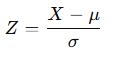

</center>

For the remaining categorical column with a `string` data type, `M/F`, we will use the `OneHotEncoder()` to convert the values into their numerical counterparts. This transformation is just as important as the feature scaling mentioned earlier. Many machine learning models, as we learned previously, require their training data to be entirely numerical. Therefore, to mitigate any possible issues from arising, this step is necessary.

Lastly, defining and transforming these values separately is inefficient. Specifically, if we are to continue with deploying the developed model and proceed with predictions on raw data, which will inevitably still contain strings or original scaling. To address this, in addition to feature scaling and encoding, we will use the `ColumnTransformer()` function to transform new raw data accordingly. This will reduce the need for repetitive data preprocessing.

In [40]:
# list columns
numeric = ['MR Delay', 'nWBV', 'EDUC', 'CDR', 'MMSE']
categorical = ['M/F']

# Define the scaler and encoder
scaler = StandardScaler()
encoder = OneHotEncoder()

# Create column transformer preprocessing
transformer = ColumnTransformer(transformers=[('numeric', scaler, numeric),
                                              ('categoric', encoder, categorical)],
                                remainder='passthrough')

Before fitting the transformer to dataset, we must first separate the target feature `Group` from the dataset:

In [41]:
# Separate dataset into X (input variables) and y (target variable)
X = rfe_selected_df.drop(columns='Group')
y = rfe_selected_df['Group'].astype('category').cat.codes # Encode the target with cat codes

Once done, we can start the fitting:

In [42]:
transformer.fit(X,y)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['MR Delay', 'nWBV', 'EDUC', 'CDR', 'MMSE']),
                                ('categoric', OneHotEncoder(), ['M/F'])])

**ii. Split Data Train-Test**

We have completed the feature scaling and encoding, and are now ready for the next step: splitting the data into training and testing sets. However, the splitting process does not stop at simply dividing the data into training and testing sets. We have also included an additional split to further separate the training data into training and validation sets. The separation is as follows:

- **First split**: 95% Training data and 5% Testing data
- **Second split**: 90% of the training data for training and 10% of the training data for validation

This results in approximately 127 data points for training, 15 for validation, and 8 for testing.

In [43]:
# First split: Training and Testing data
Xtrain, X_test, ytrain, y_test = train_test_split(X,y,train_size=0.95,random_state=42, stratify=y)
Xtrain.shape, X_test.shape, ytrain.shape, y_test.shape

((142, 6), (8, 6), (142,), (8,))

In [44]:
# First split: Training and Validation data
X_train, X_validation, y_train, y_validation = train_test_split(Xtrain,ytrain,train_size=0.90,random_state=42, stratify=ytrain)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((127, 6), (15, 6), (127,), (15,))

**iii. Model Pipelining**

The third step is model pipelining, which refers to the sequence of steps that are automatically processed according to a defined set of instructions. These instructions encompass data extraction, data preprocessing, model training, and prediction. Through pipelining, we can not only include the transformations made in the previous step but also define the model we will use, ensuring it is processed and stored simultaneously. For this model development experiment, we will incorporate 5 machine learning models:

- **Support Vector Machine (SVM)**

  A type of **Supervised Machine Learning**, SVM is a widely used machine learning algorithm capable of **linear and non-linear** classification and regression, among many uses. This algorithm is highly adaptive and is particularly known for its interpretability. SVM works by identifying the **hyperplanes** that represent the data, allowing the algorithm to search for the most optimal plane and proceed to create a line that **best separates** the data points into different classes. Through this process, SVM can filter between the most important features and accordingly delegate bigger weight to that feature. Here, we will be using **Support Vector Classification (SVC)**, which is a specific implementation of SVM tailored for classification tasks.

- **Random Forest (RF)**

  Random Forest falls into the category of **Ensemble Learning**. It involves creating **multiple decision trees** during the training phase, each using a randomly selected subset of the training data and a similarly randomly selected set of features. The technique used here is called **bootstrap aggregation** (or bagging), which ensures each set is stratified evenly. This **randomization** in Random Forest is a key advantage, as it prevents bias and helps prevent overfitting, giving Random Forest robustness. The final prediction is made by taking a vote from each decision tree and selecting the class with the most votes.

- **Decision Tree (DT)**

  Decision Tree can be described as the backbone of the Random Forest mentioned above. The working principle of this Ensemble Learning algorithm is similar, but with one major difference: Decision Tree does not involve the random selection of features. A Decision Tree consists of four key structures: (1) **Root node**, which refers to the initial decision made; (2) **Internal node**, which refers to a new decision made based on feature values; (3) **Branches**, which refer to the outcome of one node before proceeding to the next node; and (4) **Leaf node**, which refers to the final outcome after a set of internal nodes and branches. Similar to Random Forest, a Decision Tree also creates subsets of trees, repeating the node creation process until a final outcome is obtained. Finally, it performs a voting mechanism to select the class with the most votes.

- **XGboost**:

  XGBoost is another Ensemble Learning algorithm, and it stands for Extreme Gradient Boosting. It is known for its ability to handle large datasets and missing values efficiently. Like the previous two algorithms, XGBoost also creates decision trees. The key difference lies in the fact that XGBoost creates **one decision tree at a time**, rather than generating multiple trees simultaneously. Its advantage, however, is in its **Gradient Boosting** feature, where each new tree corrects the errors (or weights) defined in the previous tree. This process helps **minimize** the loss during training and incrementally **improves** accuracy with each decision tree creation. Similar to the previous algorithms, XGBoost relies on the final outcome of the trees to determine the final class predictions.   

- **Multi-Layer Perceptron**

  Multi-Layer Perceptron (MLP) is a type of **Artificial Neural Network**. It consists of three key components: the **input layer**, **hidden layer**, and **output layer**. Together, these layers form several dense layers that are interconnected. In this algorithm, the input layer will always consist of neurons equal to the number of input features in the dataset. A weight is applied to each neuron, and each neuron has its own unique bias. To proceed to the next layer, the output from the neurons in the previous layer is summed and passed as input to the next layer. This process is repeated for each new neuron, with different biases applied. Typically, a neural network operates repetitively, constantly adjusting its weights and biases. Finally, once it reaches the output layer, a final calculation is made, and the class with the highest value determines the predicted class.

<br>

For the pipelining itself, we uses the `Pipeline` function provided by `Scikit-Learn`. Each model will have its pipeline, and as mentioned above, will include both feature transformation and the model itself. Each model will have the following specifications:

- **SVC**: {kernel='linear', C=1, probability=True}
- **RF**: {max_depth=3, random_state=42}
- **DT**: {max_depth=3, random_state=42}
- **XG**: {max_depth=3, random_state=42}
- **MLP**: {solver='adam', random_state=42}

In [45]:
# Define pipeline for each model
svc_pipe = Pipeline(steps=[('transformer',transformer),('classifier',SVC(kernel='linear', C=1, probability=True))])
rf_pipe = Pipeline(steps=[('transformer',transformer),('classifier',RandomForestClassifier(max_depth=3, random_state=42))])
dt_pipe = Pipeline(steps=[('transformer',transformer),('classifier',DecisionTreeClassifier(max_depth=3, random_state=42))])
xg_pipe = Pipeline(steps=[('transformer',transformer),('classifier',XGBClassifier(max_depth=3, random_state=42))])
mlp_pipe = Pipeline(steps=[('transformer',transformer),('classifier',MLPClassifier(solver='adam', random_state=42))])

**Cross Validation**

>To get the best model for training among the five machine learning models, we will start by performing a **Cross-Validation**, using the `cross_val_score` function and the `KFold` function to stratify the data. This technique is commonly used in model development to evaluate the model's performance. Typically, it is used to **prevent overfitting** and to estimate the model's **ability to generalize and perform well** on new data. However, its function does not stop there. Instead, it is also frequently used to compare different models to determine the best one.

>This is because the technique involves dividing the available dataset into multiple folds and proceeding to use one fold as validation data, while the remaining folds are used as training data. As generally done, the model's performance will then be evaluated using a specific score defined beforehand. This process is repeated several times, with each repetition using a different set of folds as validation data, based on the number of folds created. The final result will be the average of the evaluation scores generated from each repeated modeling process.

>When comparing the five machine learning models, each will undergo this Cross-Validation technique and obtain its own Cross-Validation score. Only after this process can we compare the scores to decide which model performs best and define it as the one we will use for training our dataset.

**Scoring**

For the Cross-Validation, the scoring used here is the **Recall** evaluation score. This metric measures the proportion of positive instances that have been correctly predicted by the model out of the total actual positive instances. The formula involves dividing True Positives (TP) by the sum of TP and False Negatives (FN). We use this particular score to ensure that the final model obtained has **high sensitivity**, making it capable of identifying as many positive instances as possible correctly.

In [46]:
# Define the KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
# Implement the Cross-Validation
svc_cv = cross_val_score(svc_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
rf_cv = cross_val_score(rf_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
dt_cv = cross_val_score(dt_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
xg_cv = cross_val_score(xg_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
mlp_cv = cross_val_score(mlp_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)

Once the Cross-Validation scores of each model have been safely stored, we can proceed with the comparison. Using the `zip` function (as demonstrated below), we can directly match each result with its corresponding model name and identify the best-performing model. For this reason, in the following code, we will display each model's evaluation performance and, at the end, present the final outcome.

In [48]:
# Define necessary variables
model_name = ""
cv_score = 0

# Display all machine learning models evaluation performance by iteration
for cv, name, mod in zip([svc_cv,rf_cv,dt_cv,xg_cv,mlp_cv],
                    ['SVC','RandomForest','DecisionTree','XGBoost','MLPerceptron'],
                    [svc_pipe, rf_pipe, dt_pipe, xg_pipe, mlp_pipe]):
  print(name)
  print('Cross-Validation - Result - Recall: ',cv)
  print('Cross-Validation - Mean - Recall:', cv.mean())
  print('Cross-Validation - Std - Recall:', cv.std())
  print('-'*30)

  if cv.mean() > cv_score:
    cv_score = cv.mean()
    model_name = name
    model = mod       # Save the best model for model fitting
  else:
    pass

# Display the final evaluation and best model
print('Best CV Score: ', cv_score)
print('Best Model: ', model_name)
print('Model: ', model)

SVC
Cross-Validation - Result - Recall:  [1.         0.94117647 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9682352941176472
Cross-Validation - Std - Recall: 0.04102493123332398
------------------------------
RandomForest
Cross-Validation - Result - Recall:  [1.         0.94117647 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9682352941176472
Cross-Validation - Std - Recall: 0.04102493123332398
------------------------------
DecisionTree
Cross-Validation - Result - Recall:  [1.         0.94117647 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9682352941176472
Cross-Validation - Std - Recall: 0.04102493123332398
------------------------------
XGBoost
Cross-Validation - Result - Recall:  [1.         0.94117647 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9682352941176472
Cross-Validation - Std - Recall: 0.04102493123332398
------------------------------
MLPerceptron
Cross-Validation - Result

As observed from the cross-validation scores, the five machine learning models (SVC, RF, DT, XG, and MLP) yielded the same Cross-Validation (CV) score of **0.9682**. Due to this, the code stored the earliest machine learning model with the score of 0.9682 as its best model, which happens to be **SVC**. The fact that this model achieved a score on par with the others indicates that it performs as well as the other models. Therefore, we will proceed to the next step using SVC as our training model.

**iv. Model Training**

Now that we have identified the best model for our predictions, we can move forward with the model fitting process, as demonstrated below:

In [49]:
# Fit the model to training dataset
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['MR Delay', 'nWBV', 'EDUC',
                                                   'CDR', 'MMSE']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['M/F'])])),
                ('classifier', SVC(C=1, kernel='linear', probability=True))])

As demonstrated above, we have successfully fitted the model to our training dataset. Moving on, we can now use the model to predict both our training dataset and also our validation dataset:

In [50]:
# Predict training dataset
y_pred_train = model.predict(X_train)

# Predict validation dataset
y_pred_validation = model.predict(X_validation)

**v. Model Evaluation**

To evaluate the prediction results, we can use a **confusion matrix**—a table that summarizes the model's performance by comparing the **True labels** against the **Predicted labels**. This matrix provides four types of instances: True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN), which are positioned in the top-left, top-right, bottom-right, and bottom-left of the matrix, respectively. To better interpret the confusion matrix, we will visualize it using the `ConfusionMatrixDisplay()` function.

In [51]:
# Define the confusion matrix of training dataset
c_matrix_train = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
c_visual_train = ConfusionMatrixDisplay(confusion_matrix=c_matrix_train, display_labels=model.classes_)

# Define the confusion matrix of validation dataset
c_matrix_validation = confusion_matrix(y_validation,y_pred_validation,labels=model.classes_)
c_visual_validation = ConfusionMatrixDisplay(confusion_matrix=c_matrix_validation, display_labels=model.classes_)

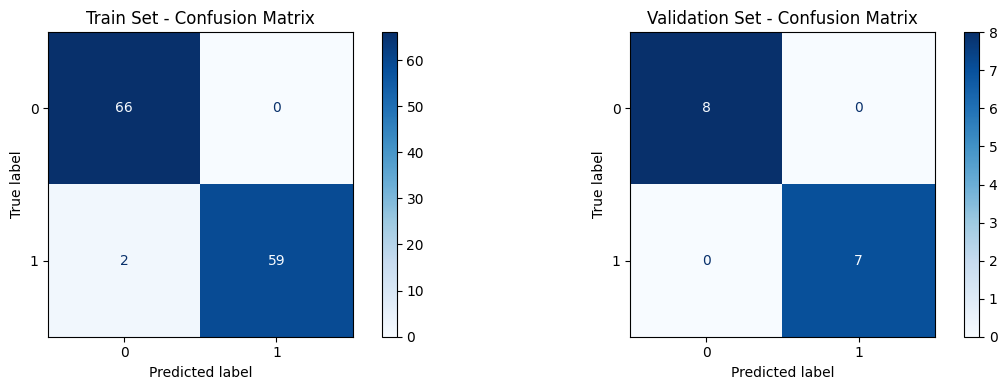

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Display the confusion matrix of the training dataset
c_visual_train.plot(ax=axes[0],cmap='Blues',)
axes[0].set_title('Train Set - Confusion Matrix')

# Display the confusion matrix of the validation dataset
c_visual_validation.plot(ax=axes[1],cmap='Blues')
axes[1].set_title('Validation Set - Confusion Matrix')

plt.tight_layout()
plt.show()

The model performed exceptionally well. As illustrated in the confusion matrix visualization above, all instances were mostly correctly predicted, with an exception in several training data incorrectly predicted as Demented, results are as follows:

<br>

A. **Training Data**

- **True Positive (TP)**: 66 out of the 66 Demented cases
- **False Positive (FP)**: 2 out of the 61 Non-demented cases
- **True Negative (TN)**: 59 out of the 61 Non-demented cases
- **False Negative (FN)**: 0 out of the 66 Demented cases

B. **Validation Data**

- **True Positive (TP)**: 8 out of the 8 Demented cases
- **False Positive (FP)**: 0 out of the 7 Non-demented cases
- **True Negative (TN)**: 7 out of the 7 Non-demented cases
- **False Negative (FN)**: 0 out of the 8 Demented cases

<br>

Observing just the confusion matrix, however, is insufficient, as it only provides a summary of predictions. From the confusion matrix, we can derive evaluation metrics such as **accuracy**, **precision**, and **recall**. Additionally, these can be further extended to advanced metrics like the **F1-score** and **ROC-AUC** score, each offering unique advantages in assessing the model's performance. Nonetheless, consistently high scores across these metrics are a strong indicator of a **well-performing model**.

In [53]:
# Create the function to evaluation the model's performance
def report(eval_scores, y_train, y_pred, report_name):
  # Define each evaluation metrics
  accuracy = accuracy_score(y_train, y_pred)
  precision = precision_score(y_train, y_pred)
  recall = recall_score(y_train, y_pred)
  F1_score = f1_score(y_train, y_pred)
  auc_score = roc_auc_score(y_train, y_pred)

  # Store the metrics in a dictionary
  scores = {
      'Accuracy' : accuracy,
      'Precision' : precision,
      'Recall' : recall,
      'F1-Score' : F1_score,
      'ROC-AUC' : auc_score
  }

  # Store the score dict into the evaluation report dict
  eval_scores[report_name] = scores

  return eval_scores

# Define the evaluation report dict
eval_scores = {}

# Obtain evaluation scores of both training and validation data
eval_scores = report(eval_scores, y_train, y_pred_train, 'Train Set Result')
eval_scores = report(eval_scores, y_validation, y_pred_validation, 'Validation Set Result')

pd.DataFrame(eval_scores)

,Train Set Result,Validation Set Result
Accuracy,0.984252,1.0
Precision,1.000000,1.0
Recall,0.967213,1.0
F1-Score,0.983333,1.0
ROC-AUC,0.983607,1.0


The result indeed confirms the confusion matrix outcome above, where most data points were correctly predicted according to their classes. The scores obtain for all five evaluation metrics (accuracy, precision, recall, F1, AUC-ROC) have exceeded 95% each. This suggests that there is no need for hyperparameter tuning, and therefore, this step of model creation will be skipped. For further validation, however, we can utilize the remaining data points to ensure that the model performs well on new, unseen data.

**vi. Model Testing**

As the prediction and evaluation process in the last step, we will also perform a prediction on the test dataset. Followed by displaying the test dataset's confusion matrix and evaluation report.

In [54]:
# Predict the test data
y_pred_test = model.predict(X_test)

In [55]:
# Define the confusion matrix of test data
c_matrix_test = confusion_matrix(y_test,y_pred_test,labels=model.classes_)
c_visual_test = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test, display_labels=model.classes_)

<Figure size 640x480 with 0 Axes>

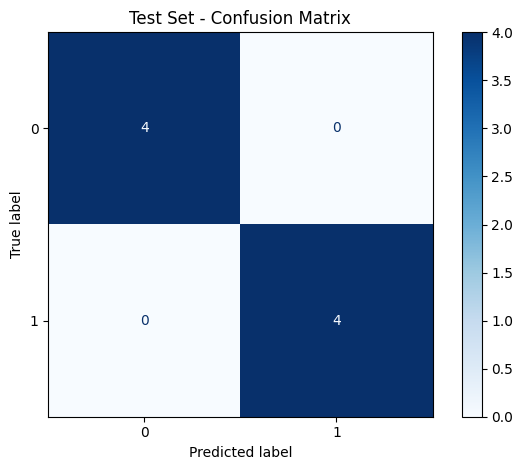

In [56]:
plt.figure()

# Display the confusion matrix of test data
c_visual_test.plot(cmap='Blues')
plt.title('Test Set - Confusion Matrix')

plt.tight_layout()
plt.show()

In [57]:
# Obtain the evaluation report of test data
eval_scores = report(eval_scores, y_test, y_pred_test, 'Test Set Result')

pd.DataFrame(eval_scores)

,Train Set Result,Validation Set Result,Test Set Result
Accuracy,0.984252,1.0,1.0
Precision,1.000000,1.0,1.0
Recall,0.967213,1.0,1.0
F1-Score,0.983333,1.0,1.0
ROC-AUC,0.983607,1.0,1.0


As displayed, both the confusion matrix and evaluation report have yielded perfect 100% evaluation scores, and the model has produced:

- **True Positive (TP)**: 4 out of the 4 Non-demented cases
- **False Positive (FP)**: 0 out of the 4 Demented cases
- **True Negative (TN)**: 4 out of the 4 Demented cases
- **False Negative (FN)**: 0 out of the 4 Non-demented cases

This mean that the model has perform exceptionally well even to a new data. One must note however, that this datasets have been aggregated and a real new data may not exactly perform the same as the one utilized in this model training. Therefore, our next step is to try our model against those un-aggregated data.

## **G. Model Deployment**

To deploy the model, we will use the `pickle` library to save our model into a .`pkl` file. This file can then be opened and utilized in another notebook. The process is as follows:

In [58]:
with open('dementia_model.pkl','wb') as file:
  pickle.dump(model,file)

To evaluate against the un-aggregated data, the evaluation will be processed in a separate file named: **`Dementia_Status_Prediction_Inference.ipynb`**